#### [타이타닉]
- 생존자 중 성별 비율 시각화

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
Font_File=r'C:\Windows\Fonts\Hancom Gothic Regular.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=Font_File).get_name()

# 새로운 폰트 패밀리 이름 지정
rc("font",family=font_name)

In [8]:
# 데이터 불러오기
tDF=pd.read_csv('titanic.csv')

In [9]:
tDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# 중복 제거
tDF.duplicated().sum()

107

In [11]:
tDF=tDF.drop_duplicates(keep='last')

In [12]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   pclass       784 non-null    int64  
 2   sex          784 non-null    object 
 3   age          678 non-null    float64
 4   sibsp        784 non-null    int64  
 5   parch        784 non-null    int64  
 6   fare         784 non-null    float64
 7   embarked     782 non-null    object 
 8   class        784 non-null    object 
 9   who          784 non-null    object 
 10  adult_male   784 non-null    bool   
 11  deck         202 non-null    object 
 12  embark_town  782 non-null    object 
 13  alive        784 non-null    object 
 14  alone        784 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 87.3+ KB


In [13]:
tDF=tDF[['survived','age','sex']]

In [14]:
tDF

,survived,age,sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
5,0,NaN,male
...,...,...,...
886,0,27.0,male
887,1,19.0,female
888,0,NaN,female
889,1,26.0,male


In [15]:
tDF.isna().sum()

survived      0
age         106
sex           0
dtype: int64

In [16]:
tDF=tDF.dropna()

In [17]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  678 non-null    int64  
 1   age       678 non-null    float64
 2   sex       678 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 21.2+ KB


In [18]:
tDF['age'].max()

80.0

In [19]:
#나이 범주화
a_range=pd.cut(tDF['age'],bins=8,labels=['10대 미만','10대','20대','30대','40대','50대','60대','70대'])

In [20]:
tDF2=tDF.copy()

tDF2['age range']=a_range

In [21]:
tDF2

,survived,age,sex,age range
0,0,22.0,male,20대
1,1,38.0,female,30대
2,1,26.0,female,20대
3,1,35.0,female,30대
6,0,54.0,male,50대
...,...,...,...,...
885,0,39.0,female,30대
886,0,27.0,male,20대
887,1,19.0,female,10대
889,1,26.0,male,20대


In [22]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  678 non-null    int64  
 1   age       678 non-null    float64
 2   sex       678 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 21.2+ KB


In [23]:
tDF2['age range']=tDF2['age range'].astype('object')
tDF2

,survived,age,sex,age range
0,0,22.0,male,20대
1,1,38.0,female,30대
2,1,26.0,female,20대
3,1,35.0,female,30대
6,0,54.0,male,50대
...,...,...,...,...
885,0,39.0,female,30대
886,0,27.0,male,20대
887,1,19.0,female,10대
889,1,26.0,male,20대


- 타이타닉 생존자 중 성별 비율

In [24]:
total=tDF2.loc[tDF2['survived']==1]['survived'].count()
total

284

In [25]:
female=tDF2.loc[(tDF2['survived']==1)&(tDF2['sex']=='female')]['sex'].count()

In [26]:
female

192

In [27]:
male=tDF2.loc[(tDF2['survived']==1)&(tDF2['sex']=='male')]['sex'].count()
male

92

In [28]:
female_A=(female/total*100).astype(float)
male_A=(male/total*100).astype(float)

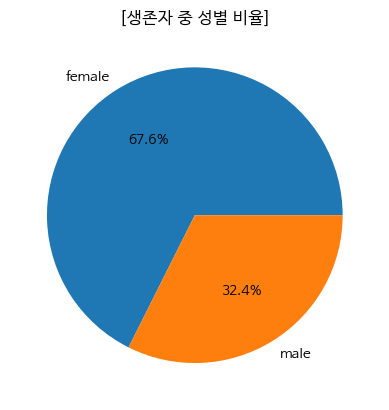

In [29]:
plt.pie([female_A,male_A],labels=['female','male'],autopct='%.1f%%')
plt.title('[생존자 중 성별 비율]')
plt.show()

- 나이별 생존자의 성별 비율 비교

In [30]:
female2=tDF2.loc[(tDF2['survived']==1)&(tDF2['sex']=='female')]['age range'].value_counts()
female2

age range
20대       58
30대       46
10대       34
40대       20
10대 미만    18
50대       13
60대        3
Name: count, dtype: int64

In [31]:
male2=tDF2.loc[(tDF2['survived']==1)&(tDF2['sex']=='male')]['age range'].value_counts()
male2

age range
20대       23
30대       22
10대 미만    19
40대       12
10대       10
50대        4
60대        1
70대        1
Name: count, dtype: int64

In [32]:
total=tDF2.loc[(tDF2['survived']==1)]['age range'].value_counts()
total

age range
20대       81
30대       68
10대       44
10대 미만    37
40대       32
50대       17
60대        4
70대        1
Name: count, dtype: int64

In [33]:
a={'female':female2,'male':male2,'total':total}
a=pd.DataFrame(a)
a

,female,male,total
age range,,,
10대,34.0,10,44
10대 미만,18.0,19,37
20대,58.0,23,81
30대,46.0,22,68
40대,20.0,12,32
50대,13.0,4,17
60대,3.0,1,4
70대,NaN,1,1


In [34]:
aDF=a.copy()
aDF['female'].fillna(0,inplace=True)
aDF

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_3520\778107060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aDF['female'].fillna(0,inplace=True)


,female,male,total
age range,,,
10대,34.0,10,44
10대 미만,18.0,19,37
20대,58.0,23,81
30대,46.0,22,68
40대,20.0,12,32
50대,13.0,4,17
60대,3.0,1,4
70대,0.0,1,1


In [35]:
aDF.iloc[0,1]

10

In [36]:
((aDF.iloc[0][0])/(aDF.iloc[0][2])*100)

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_3520\668117110.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((aDF.iloc[0][0])/(aDF.iloc[0][2])*100)


77.27272727272727

In [37]:
aDF['female_s']=0
aDF['male_s']=0
aDF

,female,male,total,female_s,male_s
age range,,,,,
10대,34.0,10,44,0,0
10대 미만,18.0,19,37,0,0
20대,58.0,23,81,0,0
30대,46.0,22,68,0,0
40대,20.0,12,32,0,0
50대,13.0,4,17,0,0
60대,3.0,1,4,0,0
70대,0.0,1,1,0,0


In [38]:
aDF.iloc[0,3]=3
aDF

,female,male,total,female_s,male_s
age range,,,,,
10대,34.0,10,44,3,0
10대 미만,18.0,19,37,0,0
20대,58.0,23,81,0,0
30대,46.0,22,68,0,0
40대,20.0,12,32,0,0
50대,13.0,4,17,0,0
60대,3.0,1,4,0,0
70대,0.0,1,1,0,0


In [39]:
for i in range(0,8):
    female_A=((aDF.iloc[i,0])/(aDF.iloc[i,2])*100)#.astype(float)
    male_A=((aDF.iloc[i,1])/(aDF.iloc[i,2])*100)#.astype(float)
    aDF.iloc[i,3]=female_A
    aDF.iloc[i,4]=male_A

aDF

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_3520\840762228.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '77.27272727272727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aDF.iloc[i,3]=female_A
C:\Users\KDP-27\AppData\Local\Temp\ipykernel_3520\840762228.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22.727272727272727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aDF.iloc[i,4]=male_A


,female,male,total,female_s,male_s
age range,,,,,
10대,34.0,10,44,77.272727,22.727273
10대 미만,18.0,19,37,48.648649,51.351351
20대,58.0,23,81,71.604938,28.395062
30대,46.0,22,68,67.647059,32.352941
40대,20.0,12,32,62.500000,37.500000
50대,13.0,4,17,76.470588,23.529412
60대,3.0,1,4,75.000000,25.000000
70대,0.0,1,1,0.000000,100.000000


In [40]:
aDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 10대 to 70대
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   female    8 non-null      float64
 1   male      8 non-null      int64  
 2   total     8 non-null      int64  
 3   female_s  8 non-null      float64
 4   male_s    8 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 384.0+ bytes


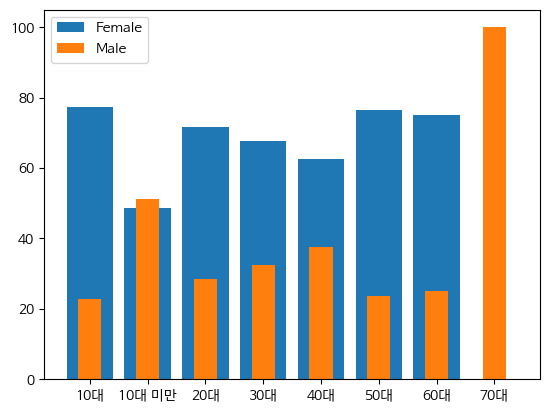

In [41]:
# [3] 데이터 시각화 - 수직막대그래프
plt.bar(aDF.index,aDF['female_s'], width=0.8,label='Female')
plt.bar(aDF.index,aDF['male_s'], width=0.4,label='Male')
plt.legend()
plt.show()

In [43]:
# 데이터 불러오기
DF=pd.read_excel('시도별 전출입 인구수.xlsx')

In [44]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [45]:
DF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [51]:
DF.drop(index=0,inplace=True)

In [52]:
DF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [55]:
DF['전출지별'].ffill(inplace=True)

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_3520\2340374271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['전출지별'].ffill(inplace=True)


In [56]:
DF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
